In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

## Make model ready

In [3]:
#imports the VGG model
base_model=VGG16(weights='imagenet',include_top=False) 

x=base_model.output
x=GlobalAveragePooling2D()(x)
#add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) 
#dense layer 2
x=Dense(1024,activation='relu')(x) 
#dense layer 3
x=Dense(512,activation='relu')(x) 
#final layer with softmax activation
preds=Dense(2,activation='softmax')(x) 

58892288/58889256 [==============================] - 0s 0us/step


In [4]:
#spedify input and output
model=Model(inputs=base_model.input,outputs=preds)

In [5]:
#Transfer learning layers
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [6]:
#Generate dataset
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #
# this is where you specify the path to the main data folder
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/Active/valid/', 
                                                 target_size=(60,60),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 4150 images belonging to 2 classes.


## Compile and train

In [7]:
#Compile model 
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
step_size_train=train_generator.n//train_generator.batch_size
#Train model
vgg_16_model =  model.fit(train_generator,steps_per_epoch=step_size_train,epochs=5)

Epoch 1/5
129/129 [==============================] - 706s 5s/step - loss: 0.6647 - accuracy: 0.6605
Epoch 2/5
129/129 [==============================] - 14s 105ms/step - loss: 0.4245 - accuracy: 0.8002
Epoch 3/5
129/129 [==============================] - 13s 104ms/step - loss: 0.3589 - accuracy: 0.8349
Epoch 4/5
129/129 [==============================] - 13s 104ms/step - loss: 0.3166 - accuracy: 0.8658
Epoch 5/5
129/129 [==============================] - 13s 104ms/step - loss: 0.2587 - accuracy: 0.8868


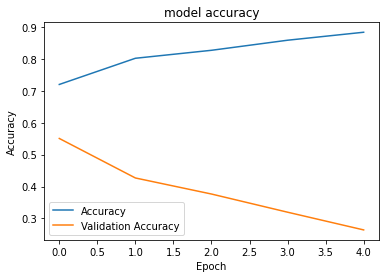

In [8]:
#Check results
import matplotlib.pyplot as plt
plt.plot(vgg_16_model.history['accuracy'])
plt.plot(vgg_16_model.history['loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [9]:
#Define classes
import numpy as np
images = np.array(['Cat','Dog'])

## Predictions

Dog


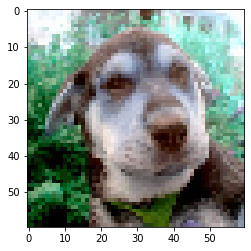

In [15]:
import matplotlib.pyplot as plt
import cv2
im = cv2.imread('/content/drive/MyDrive/Active/do/train/dog/18.jpg')
im = cv2.resize(im,(60,60))

im = im.reshape(1,60,60,3)
im_n = im/im.max()

print(images[np.argmax(model.predict(im_n))])
import matplotlib.pyplot as plt
plt.imshow(im.reshape(60,60,3))
plt.show()

Cat


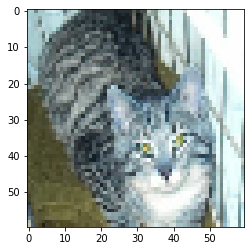

In [18]:
import matplotlib.pyplot as plt
im = cv2.imread('/content/drive/MyDrive/Active/do/valid/cat/19.jpg')
im = cv2.resize(im,(60,60))

im = im.reshape(1,60,60,3)
im_n = im/im.max()

print(images[np.argmax(model.predict(im_n))])
import matplotlib.pyplot as plt

plt.imshow(im.reshape(60,60,3))
plt.show()